# Michael Somppi

## Research question/interests

I am interested in analyzing the electrification of our world to see if the data supports electricity being a cleaner form of energy. First, I want to see how the world's electricity generation and demand has changed over time. What countries generate the most electricity? What countries demand the most electricity? What is their electricity mix? Is there a strong correlation between countries with high electricity generation from low-carbon sources and lower emissions? I can envision making a dashboard to visualize the answers to these questions using the database from [Our World in Data](https://ourworldindata.org/energy).

In [ ]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import os

## Load data

In [ ]:
# load data from repo
df = pd.read_csv('../data/raw/owid-energy-data.csv')
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,NaN,NaN,NaN,NaN,22.477,...,0.137,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22339,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,NaN,NaN,NaN,NaN,27.011,...,0.110,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22340,Zimbabwe,2019,ZWE,14645473.0,NaN,NaN,NaN,NaN,NaN,25.947,...,0.088,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22341,Zimbabwe,2020,ZWE,14862927.0,NaN,NaN,NaN,NaN,NaN,24.221,...,0.090,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## Exploratory Data Analysis
### Plot Settings

In [ ]:
sns.set_theme(style='white')
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('legend', fontsize=12)

### Step 1
The first step is exploring the entire dataset to get a better understanding of what it contains.

In [ ]:
# number of rows and columns in dataset
df.shape

(22343, 128)

In [ ]:
# columns in dataset
columns = set(df.columns)
print(f'The columns in the dataset are: \n {columns}')

The columns in the dataset are: 
 {'low_carbon_cons_change_twh', 'net_elec_imports_share_demand', 'other_renewables_elec_per_capita_exc_biofuel', 'electricity_generation', 'nuclear_elec_per_capita', 'solar_consumption', 'coal_elec_per_capita', 'gas_prod_change_twh', 'net_elec_imports', 'coal_cons_change_pct', 'coal_share_energy', 'nuclear_share_energy', 'solar_share_energy', 'wind_consumption', 'coal_share_elec', 'hydro_share_energy', 'hydro_energy_per_capita', 'low_carbon_consumption', 'biofuel_share_energy', 'gas_elec_per_capita', 'oil_prod_change_pct', 'wind_elec_per_capita', 'hydro_share_elec', 'other_renewable_consumption', 'wind_energy_per_capita', 'gas_production', 'energy_per_capita', 'wind_cons_change_pct', 'hydro_electricity', 'other_renewables_cons_change_twh', 'other_renewables_share_elec_exc_biofuel', 'biofuel_cons_per_capita', 'solar_energy_per_capita', 'solar_elec_per_capita', 'nuclear_energy_per_capita', 'oil_cons_change_pct', 'energy_cons_change_pct', 'oil_elec_per_cap

In [ ]:
# number of unique values for each column
df.nunique(axis=0)

country                     314
year                        122
iso_code                    219
population                17917
gdp                       11113
                          ...  
wind_elec_per_capita       2172
wind_electricity           1656
wind_energy_per_capita     1900
wind_share_elec            1661
wind_share_energy          1108
Length: 128, dtype: int64


Preview of data with null values:
xxxxxxxxxxxxx
       country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  Afghanistan  1900      AFG   4832414.0  NaN                      NaN   
1  Afghanistan  1901      AFG   4879685.0  NaN                      NaN   
2  Afghanistan  1902      AFG   4935122.0  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               NaN                 NaN   
1                      NaN  ...               NaN                 NaN   
2                      NaN  ...               NaN                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_

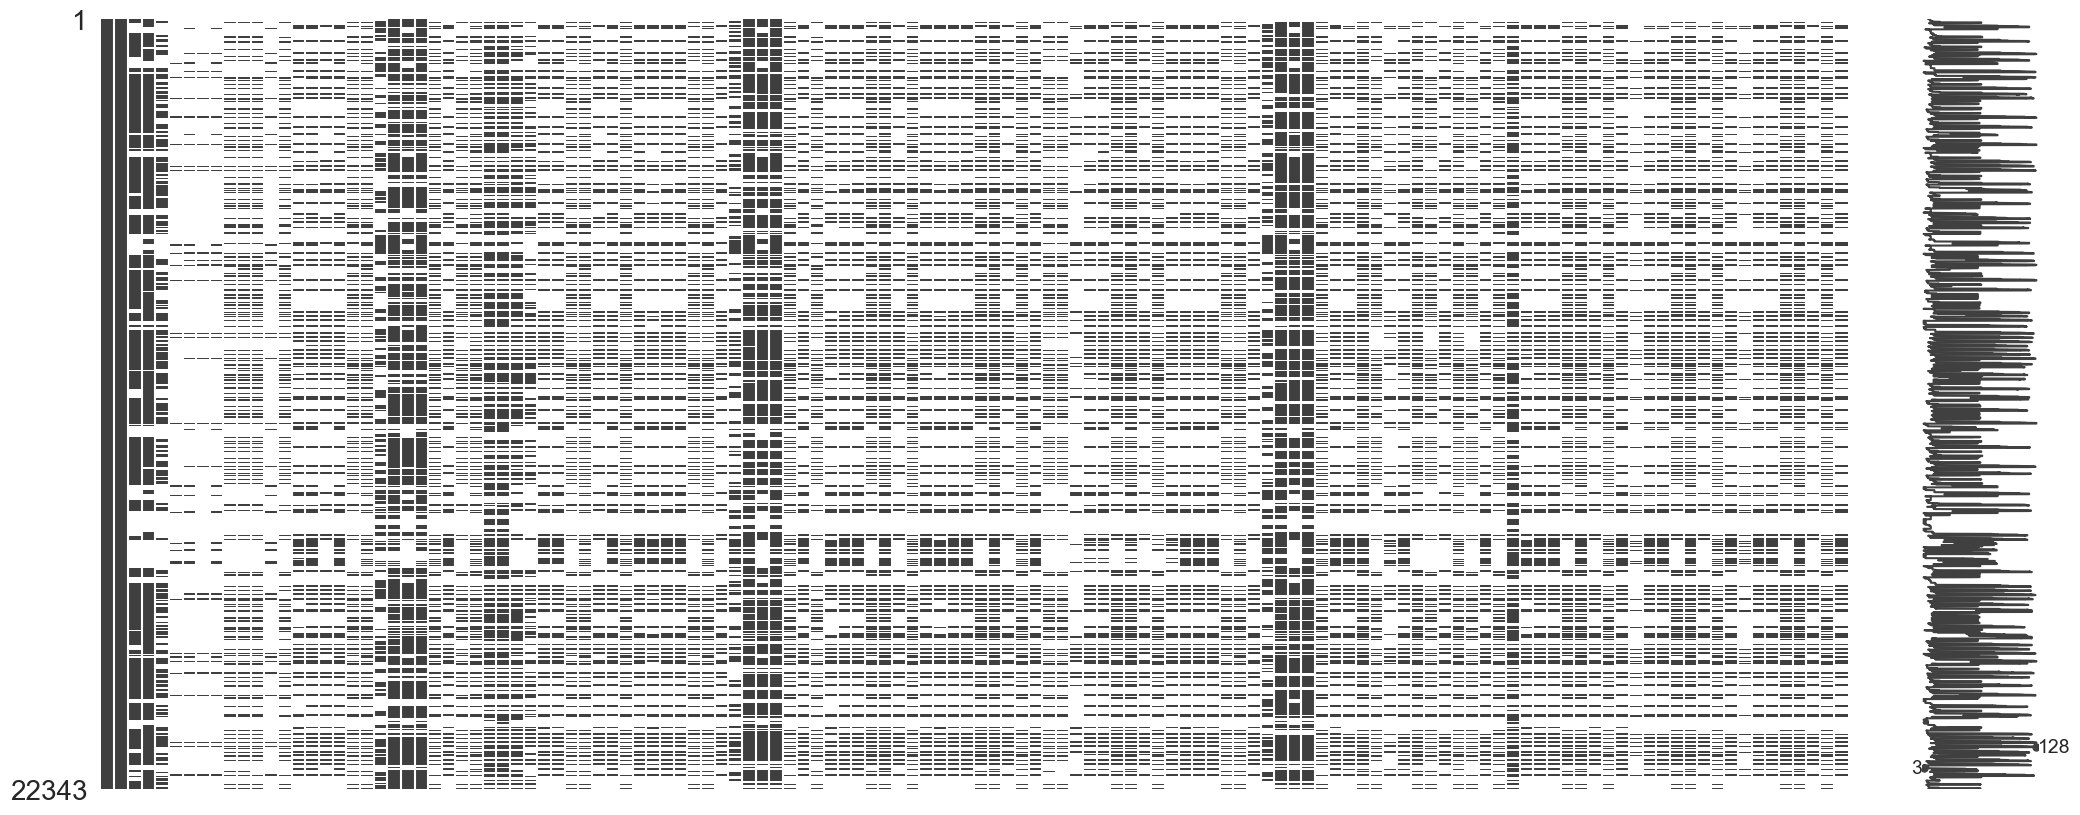

In [ ]:
# generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

#### Step 1 Takeaways
This is clearly a large dataset with 128 columns, spanning 122 years with data for 314 countries. The null values plot above indicates the dataset has a large amount of missing data (white spaces indicate missing data). This is understandable as many countries do not have a diverse energy mix that contains all forms of energy generation/consumption. Additionally, some forms of energy generation (ie. wind, solar, etc.) are newer and do not date back to the early 1900s.

### Step 2
My research interest is related specifically to energy in the form of electricity. Only some of the columns pertain to my research interest, so the dataframe can be made smaller to contain only the necessary columns.<br> The **codebook** offered by *Our World in Data* is a helpful reference that describes the meaning of each column.

In [ ]:
codebook = pd.read_csv("https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv")
# Look at only columns that relate to electricity
codebook.loc[codebook["column"].str.contains("elec")]

,column,description,source
9,biofuel_elec_per_capita,Per capita electricity generation from biofuel...,Calculated by Our World in Data based on BP St...
10,biofuel_electricity,"Electricity generation from biofuels, measured...",Calculated by Our World in Data based on BP St...
11,biofuel_share_elec,Share of electricity generation that comes fro...,Calculated by Our World in Data based on BP St...
13,carbon_intensity_elec,"Carbon intensity of electricity production, me...",Calculated by Our World in Data based on BP St...
18,coal_elec_per_capita,"Per capita electricity generation from coal, m...",Calculated by Our World in Data based on BP St...
19,coal_electricity,"Electricity generation from coal, measured in ...",Calculated by Our World in Data based on BP St...
24,coal_share_elec,Share of electricity generation that comes fro...,Calculated by Our World in Data based on BP St...
26,electricity_demand,"Electricity demand, measured in terawatt-hours",Calculated by Our World in Data based on BP St...
27,electricity_generation,"Electricity generation, measured in terawatt-h...",Calculated by Our World in Data based on BP St...
34,fossil_elec_per_capita,Per capita electricity generation from fossil ...,Calculated by Our World in Data based on BP St...


Now we can see all columns that contain the string 'elec'. Most columns relate to different forms of electricity generation. Electricity demand and electricity generation columns are all encompassing.<br>
#### Step 2.1
First, let's look at global energy trends.

In [ ]:
### create dataframe to compare global electricty vs primary energy
df_energy = df[["year", "country", "population", "electricity_demand", "electricity_generation", "per_capita_electricity", "primary_energy_consumption", "energy_per_capita"]]
# remove all countries except 'World' from dataset
df_energy = df_energy[df_energy["country"].str.contains("World")==True]
# remove all rows with NaN in column 'primary_energy_consumption'
df_energy = df_energy.dropna(subset=["electricity_generation"])
# reset index and drop the index column
df_energy = df_energy.reset_index(drop=True)
df_energy.head(3)

,year,country,population,electricity_demand,electricity_generation,per_capita_electricity,primary_energy_consumption,energy_per_capita
0,1985,World,4.870918e+09,NaN,9883.152,2029.012,84297.336,17306.252
1,1986,World,4.960564e+09,NaN,10178.033,2051.789,86183.875,17373.805
2,1987,World,5.052518e+09,NaN,10667.898,2111.402,89189.680,17652.521


In [ ]:
df_energy.tail(3)

,year,country,population,electricity_demand,electricity_generation,per_capita_electricity,primary_energy_consumption,energy_per_capita
34,2019,World,7.713458e+09,26244.080,27036.617,3505.123,163173.953,21154.447
35,2020,World,7.794789e+09,25998.789,26889.158,3449.633,156669.938,20099.318
36,2021,World,7.874956e+09,27450.381,28466.295,3614.788,165319.688,20993.094


In [ ]:
Delta_Per_Cap_Elec = 3614.788 - 2020.012
print(f'The change in per capita electricity generation from 1985 to 2021 is {Delta_Per_Cap_Elec:.2f} Kilowatt-hours.')
Delta_Per_Cap_Energy = 20993.094 - 17306.252
print(f'The change in per capita energy consumption from 1985 to 2021 is {Delta_Per_Cap_Energy:.2f} Kilowatt-hours.')

The change in per capita electricity generation from 1985 to 2021 is 1594.78 Kilowatt-hours.
The change in per capita energy consumption from 1985 to 2021 is 3686.84 Kilowatt-hours.


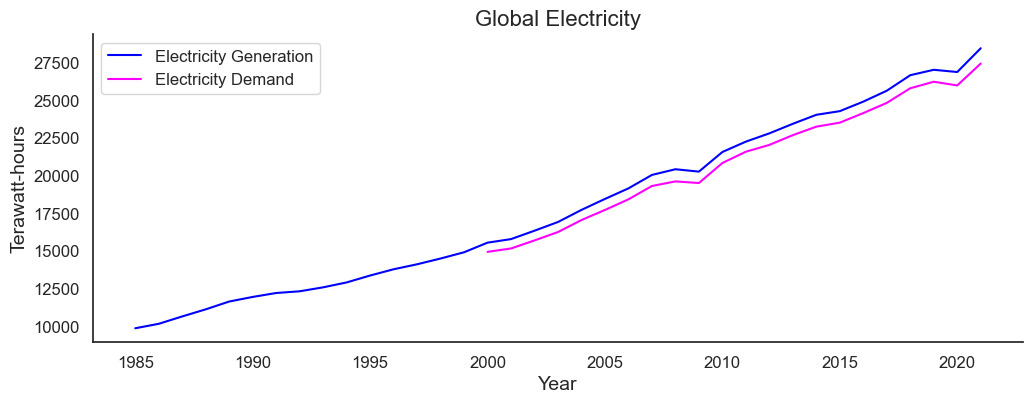

In [ ]:
# Plot the global electricity demand & electricity generation trends over time
plt.figure(figsize=(12,4))
plt.plot(df_energy["year"], df_energy["electricity_generation"], label='Electricity Generation', color='blue')
plt.plot(df_energy["year"], df_energy["electricity_demand"], label='Electricity Demand', color='magenta')
plt.legend(loc='upper left')
plt.ylabel('Terawatt-hours')
plt.xlabel('Year')
plt.title('Global Electricity')
sns.despine()
plt.show()

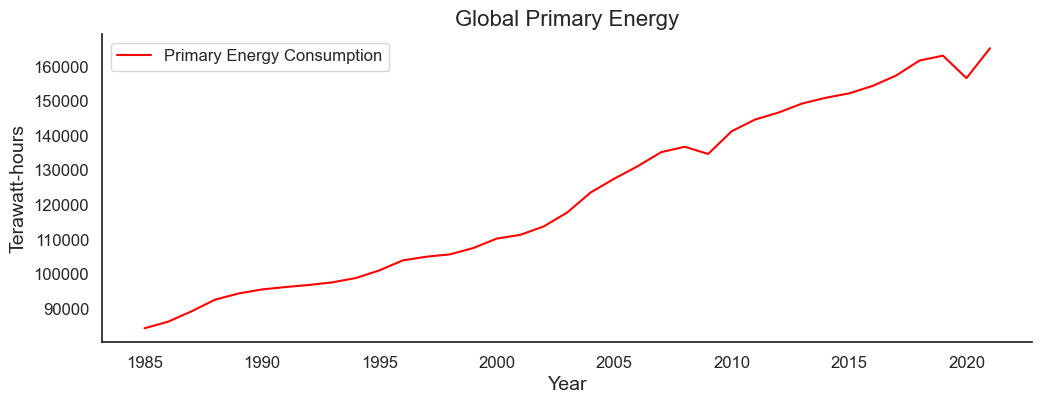

In [ ]:
# Plot the primary energy consumption trend over time
plt.figure(figsize=(12,4))
plt.plot(df_energy["year"], df_energy["primary_energy_consumption"], label='Primary Energy Consumption', color='red')
plt.legend(loc='upper left')
plt.ylabel('Terawatt-hours')
plt.xlabel('Year')
plt.title('Global Primary Energy')
sns.despine()
plt.show()

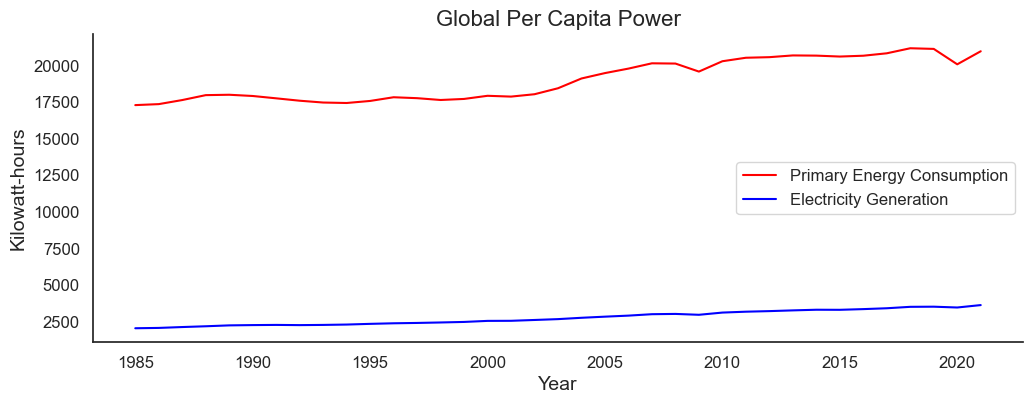

In [ ]:
# Plot the per capita electricity & energy per capita trends over time
plt.figure(figsize=(12,4))
plt.plot(df_energy["year"], df_energy["energy_per_capita"], label='Primary Energy Consumption', color='red')
plt.plot(df_energy["year"], df_energy["per_capita_electricity"], label='Electricity Generation', color='blue')
plt.legend(loc='right')
plt.ylabel('Kilowatt-hours')
plt.xlabel('Year')
plt.title('Global Per Capita Power')
sns.despine()
plt.show()

#### Step 2.1 Takeaways
The trends over time for electricity demand/generation and primary energy consumption are very similar. The global per capita power figure shows both electricity and overall energy use is steadily increasing. The delta for per capita primary energy consumption from 1985 to 2021 is actually more than double the delta for per capita electricity generation over the same time span. Electrification is a trendy topic, but the data does not indicate global electricity generation is increasing at a faster rate than overall energy consumption.

#### Step 2.2
Let's explore electricity by country.

In [ ]:
### create dataframe to look at only electricity generation columns
# create dataframe with desired columns
df_1 = df[["year", "country", "population", "gdp"]]
# create another dataframe with columns that contain the string 'elec'
df_2 = df.loc[:, df.columns.str.contains("elec")]
# merge the two dataframe to create desired dataframe
df_electricity = pd.concat([df_1, df_2], join='outer', axis=1)
# remove all rows with NaN in column 'electricity_generation'
df_electricity = df_electricity.dropna(subset=["electricity_generation"])
# remove rows that don't reach the specified non-null value threshold
df_electricity = df_electricity.dropna(axis=0, thresh=5)
# remove all row with Nan in column 'population'
df_electricity = df_electricity.dropna(subset=["population"])
# remove non-countries from dataset
df_electricity = df_electricity[df_electricity["country"].str.contains("World|Asia|income|America|Europe|Africa|Oceania")==False]
# reset index and drop the index column
df_electricity = df_electricity.reset_index(drop=True)
df_electricity

,year,country,population,gdp,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_elec_per_capita,coal_electricity,...,per_capita_electricity,renewables_elec_per_capita,renewables_electricity,renewables_share_elec,solar_elec_per_capita,solar_electricity,solar_share_elec,wind_elec_per_capita,wind_electricity,wind_share_elec
0,2000,Afghanistan,20779958.0,1.128379e+10,0.000,0.00,0.000,255.319,0.000,0.00,...,22.618,14.918,0.31,65.957,0.000,0.00,0.000,0.0,0.0,0.0
1,2001,Afghanistan,21606992.0,1.102127e+10,0.000,0.00,0.000,118.644,0.000,0.00,...,27.306,23.141,0.50,84.746,0.000,0.00,0.000,0.0,0.0,0.0
2,2002,Afghanistan,22600774.0,1.880487e+10,0.000,0.00,0.000,144.928,0.000,0.00,...,30.530,24.778,0.56,81.159,0.000,0.00,0.000,0.0,0.0,0.0
3,2003,Afghanistan,23680872.0,2.107434e+10,0.000,0.00,0.000,255.319,0.000,0.00,...,39.694,26.604,0.63,67.021,0.000,0.00,0.000,0.0,0.0,0.0
4,2004,Afghanistan,24726690.0,2.233257e+10,0.000,0.00,0.000,269.663,0.000,0.00,...,35.993,22.648,0.56,62.921,0.000,0.00,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,2016,Zimbabwe,14030338.0,2.096179e+10,25.659,0.36,5.279,442.815,246.608,3.46,...,486.090,236.630,3.32,48.680,0.713,0.01,0.147,0.0,0.0,0.0
5687,2017,Zimbabwe,14236599.0,2.194784e+10,22.477,0.32,4.378,363.885,212.129,3.02,...,513.465,299.229,4.26,58.276,0.702,0.01,0.137,0.0,0.0,0.0
5688,2018,Zimbabwe,14438812.0,2.271535e+10,27.011,0.39,4.272,358.160,255.561,3.69,...,632.324,373.992,5.40,59.146,0.693,0.01,0.110,0.0,0.0,0.0
5689,2019,Zimbabwe,14645473.0,NaN,25.947,0.38,3.360,288.240,247.175,3.62,...,772.252,522.346,7.65,67.639,0.683,0.01,0.088,0.0,0.0,0.0


In [ ]:
# From df_electricity create dataframe to look compare electricity columns
df_comp = df_electricity[["year", "country", "population", "gdp", "carbon_intensity_elec", "low_carbon_electricity", "low_carbon_elec_per_capita", "low_carbon_share_elec", "electricity_generation", "per_capita_electricity", "electricity_demand"]]
# Change column names
df_comp = df_comp.rename(columns={"year" : "Year", "country" : "Country", "population" : "Population", "gdp" : "GDP", "carbon_intensity_elec" : "Carbon Intensity", "low_carbon_electricity" : "Low Carbon Electricity", "low_carbon_elec_per_capita" : "Per Capita Low Carbon", "low_carbon_share_elec" : "Share from Low Carbon Sources", "electricity_generation" : "Electricity Generation", "per_capita_electricity" : "Per Capita Generation", "electricity_demand" : "Electricity Demand"})
# Remove rows from prior to the year 2000
df_comp = df_comp[df_comp["Year"] >= 2000]
# Add a new column for per capita electricity demand converted from terawatt-hours to kilowatt-hours
df_comp["Per Capita Demand"] = (df_comp["Electricity Demand"] * 1e9) / df_comp["Population"]
# reset index and drop the index column
df_comp = df_comp.reset_index(drop=True)
df_comp

,Year,Country,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
0,2000,Afghanistan,20779958.0,1.128379e+10,255.319,0.31,14.918,65.957,0.47,22.618,0.57,27.430277
1,2001,Afghanistan,21606992.0,1.102127e+10,118.644,0.50,23.141,84.746,0.59,27.306,0.69,31.934107
2,2002,Afghanistan,22600774.0,1.880487e+10,144.928,0.56,24.778,81.159,0.69,30.530,0.79,34.954555
3,2003,Afghanistan,23680872.0,2.107434e+10,255.319,0.63,26.604,67.021,0.94,39.694,1.04,43.917302
4,2004,Afghanistan,24726690.0,2.233257e+10,269.663,0.56,22.648,62.921,0.89,35.993,0.99,40.037708
...,...,...,...,...,...,...,...,...,...,...,...,...
4501,2016,Zimbabwe,14030338.0,2.096179e+10,442.815,3.32,236.630,48.680,6.82,486.090,8.67,617.946624
4502,2017,Zimbabwe,14236599.0,2.194784e+10,363.885,4.26,299.229,58.276,7.31,513.465,9.53,669.401449
4503,2018,Zimbabwe,14438812.0,2.271535e+10,358.160,5.40,373.992,59.146,9.13,632.324,10.15,702.966421
4504,2019,Zimbabwe,14645473.0,NaN,288.240,7.65,522.346,67.639,11.31,772.252,12.42,848.043624


There are too many countries to compare in this list. I'm interested in looking at the countries that generate and demand the most electricity. To do this, I will create a new dataframe to look at the mean values over the last 5 years of complete data (2016-2020).

In [ ]:
# Further widdle down dataframe to look at the mean values from 2016-2020
df_mean = df_comp[df_comp["Year"] >= 2016]
df_mean = df_mean[df_mean["Year"] <= 2020]
# Find the mean values over the 5 year span for each country
df_mean = df_mean.groupby(["Country"], as_index=False).mean()

Top 10 countries sorted by electricity demand:

In [ ]:
# sort by electricity demand
df_mean.sort_values(["Electricity Demand"], ascending=False).head(10)

,Country,Year,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
37,China,2018.0,1.427165e+09,1.766073e+13,565.4760,2139.1684,1497.6602,30.2644,7037.2456,4928.4970,6975.620,4885.334466
200,United States,2018.0,3.270529e+08,1.763316e+13,380.6050,1582.9834,4838.9152,36.3030,4361.5958,13337.0926,4156.568,12710.221222
88,India,2018.0,1.352452e+09,8.292951e+12,646.6542,305.9586,225.8102,19.9514,1527.5402,1128.9706,1521.240,1124.345716
156,Russia,2018.0,1.456692e+08,3.533151e+12,349.0050,401.0856,2753.2400,36.5032,1098.9828,7544.3420,1026.868,7049.286174
96,Japan,2018.0,1.271610e+08,4.814414e+12,462.3574,215.6532,1696.6536,20.9522,1030.6184,8104.5382,939.922,7391.123834
24,Brazil,2018.0,2.094150e+08,2.927146e+12,126.5446,508.7906,2428.6990,84.2784,603.4400,2880.9966,626.976,2993.548730
32,Canada,2018.0,3.706856e+07,1.630664e+12,130.7614,533.9802,14408.1070,81.3036,656.8060,17723.7838,582.694,15722.742692
71,Germany,2018.0,8.305552e+07,3.816293e+12,385.2332,298.4076,3591.7520,48.0278,624.1034,7516.8320,579.004,6972.779937
175,South Korea,2018.0,5.114921e+07,1.905024e+12,452.0758,179.5082,3509.4390,31.0626,578.4754,11309.3344,545.004,10654.794640
65,France,2018.0,6.498077e+07,2.532422e+12,60.9790,502.0752,7726.7768,90.6012,554.1542,8528.4434,507.734,7814.194266


Top 10 countries sorted by per capita electricity demand:

In [ ]:
# sort by per capita electricity demand
df_mean.sort_values(["Per Capita Demand"], ascending=False).head(10)

,Country,Year,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
87,Iceland,2018.0,336720.6,1.472628e+10,28.1564,19.2438,57150.7180,99.9872,19.2466,57158.0624,19.246,57156.681655
141,Norway,2018.0,5337067.0,4.421678e+11,33.6076,143.0046,26798.4998,97.3368,146.9054,27530.2136,133.002,24924.118803
12,Bahrain,2018.0,1566411.4,6.100816e+10,490.1330,0.0100,6.4098,0.0348,28.6740,18320.4554,28.798,18396.372002
101,Kuwait,2018.0,4125583.6,2.793532e+11,455.4100,0.0594,14.4018,0.0808,73.4202,17797.9294,68.270,16554.915603
64,Finland,2018.0,5520909.6,2.101688e+11,88.7958,55.6242,10074.4382,79.7228,69.7734,12638.0394,87.248,15803.805346
153,Qatar,2018.0,2774783.8,3.946736e+11,456.9472,0.1232,44.4630,0.2632,46.9814,16917.9500,43.814,15782.046725
32,Canada,2018.0,37068556.8,1.630664e+12,130.7614,533.9802,14408.1070,81.3036,656.8060,17723.7838,582.694,15722.742692
181,Sweden,2018.0,9969637.8,4.537049e+11,12.2624,159.6580,16012.8552,97.8256,163.2010,16368.5840,143.400,14386.597378
198,United Arab Emirates,2018.0,9628014.6,7.235323e+11,449.7908,2.4738,252.7882,1.8040,135.1920,14041.3420,126.206,13110.952053
200,United States,2018.0,327052908.8,1.763316e+13,380.6050,1582.9834,4838.9152,36.3030,4361.5958,13337.0926,4156.568,12710.221222


Top 10 countries sorted by electricity generation:

In [ ]:
# sort by electricity generation
df_mean.sort_values(["Electricity Generation"], ascending=False).head(10)

,Country,Year,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
37,China,2018.0,1.427165e+09,1.766073e+13,565.4760,2139.1684,1497.6602,30.2644,7037.2456,4928.4970,6975.620,4885.334466
200,United States,2018.0,3.270529e+08,1.763316e+13,380.6050,1582.9834,4838.9152,36.3030,4361.5958,13337.0926,4156.568,12710.221222
88,India,2018.0,1.352452e+09,8.292951e+12,646.6542,305.9586,225.8102,19.9514,1527.5402,1128.9706,1521.240,1124.345716
156,Russia,2018.0,1.456692e+08,3.533151e+12,349.0050,401.0856,2753.2400,36.5032,1098.9828,7544.3420,1026.868,7049.286174
96,Japan,2018.0,1.271610e+08,4.814414e+12,462.3574,215.6532,1696.6536,20.9522,1030.6184,8104.5382,939.922,7391.123834
32,Canada,2018.0,3.706856e+07,1.630664e+12,130.7614,533.9802,14408.1070,81.3036,656.8060,17723.7838,582.694,15722.742692
71,Germany,2018.0,8.305552e+07,3.816293e+12,385.2332,298.4076,3591.7520,48.0278,624.1034,7516.8320,579.004,6972.779937
24,Brazil,2018.0,2.094150e+08,2.927146e+12,126.5446,508.7906,2428.6990,84.2784,603.4400,2880.9966,626.976,2993.548730
175,South Korea,2018.0,5.114921e+07,1.905024e+12,452.0758,179.5082,3509.4390,31.0626,578.4754,11309.3344,545.004,10654.794640
65,France,2018.0,6.498077e+07,2.532422e+12,60.9790,502.0752,7726.7768,90.6012,554.1542,8528.4434,507.734,7814.194266


Top 10 countries sorted by per capita electricity generation:

In [ ]:
# sort by per capita electricity generation
df_mean.sort_values(["Per Capita Generation"], ascending=False).head(10)

,Country,Year,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
87,Iceland,2018.0,336720.6,1.472628e+10,28.1564,19.2438,57150.7180,99.9872,19.2466,57158.0624,19.246,57156.681655
141,Norway,2018.0,5337067.0,4.421678e+11,33.6076,143.0046,26798.4998,97.3368,146.9054,27530.2136,133.002,24924.118803
12,Bahrain,2018.0,1566411.4,6.100816e+10,490.1330,0.0100,6.4098,0.0348,28.6740,18320.4554,28.798,18396.372002
101,Kuwait,2018.0,4125583.6,2.793532e+11,455.4100,0.0594,14.4018,0.0808,73.4202,17797.9294,68.270,16554.915603
32,Canada,2018.0,37068556.8,1.630664e+12,130.7614,533.9802,14408.1070,81.3036,656.8060,17723.7838,582.694,15722.742692
153,Qatar,2018.0,2774783.8,3.946736e+11,456.9472,0.1232,44.4630,0.2632,46.9814,16917.9500,43.814,15782.046725
181,Sweden,2018.0,9969637.8,4.537049e+11,12.2624,159.6580,16012.8552,97.8256,163.2010,16368.5840,143.400,14386.597378
198,United Arab Emirates,2018.0,9628014.6,7.235323e+11,449.7908,2.4738,252.7882,1.8040,135.1920,14041.3420,126.206,13110.952053
200,United States,2018.0,327052908.8,1.763316e+13,380.6050,1582.9834,4838.9152,36.3030,4361.5958,13337.0926,4156.568,12710.221222
64,Finland,2018.0,5520909.6,2.101688e+11,88.7958,55.6242,10074.4382,79.7228,69.7734,12638.0394,87.248,15803.805346


I find the last top 10 list the most interesting. The top 10 countries per capita electricity generation. There is a real mix in carbon intensity between these countries. Let's plot it! 

In [ ]:
# reset index and keep only top 10 countries
df_mean = df_mean.sort_values(["Per Capita Generation"], ascending=False)
df_mean = df_mean.reset_index(drop=True)
df_mean = df_mean.head(10)

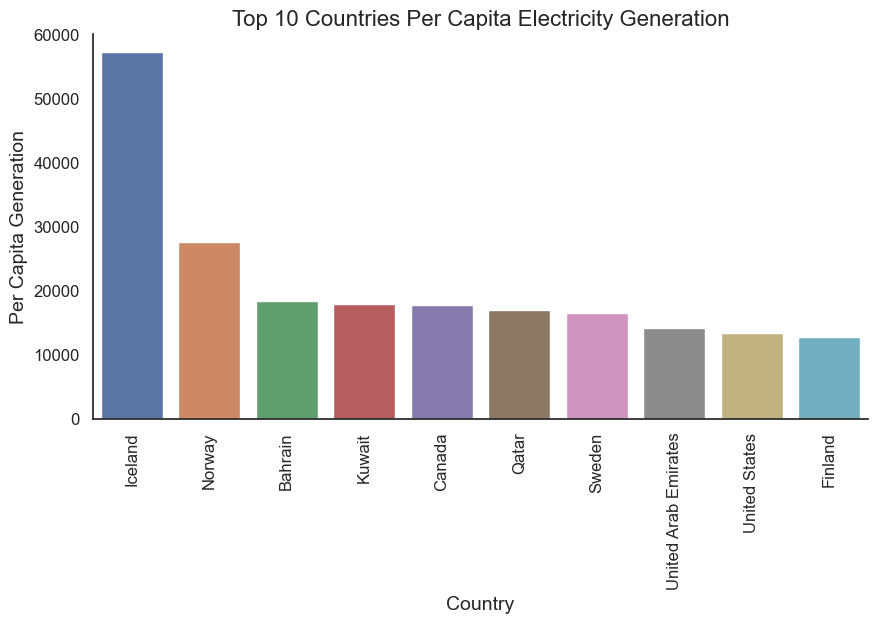

In [ ]:
# Plot the top 10 countries per capita electricity generation
plt.figure(figsize=(10,5))
sns.barplot(data=df_mean, x="Country", y="Per Capita Generation")
sns.despine()
plt.title("Top 10 Countries Per Capita Electricity Generation")
plt.xticks(rotation=90)
plt.show()

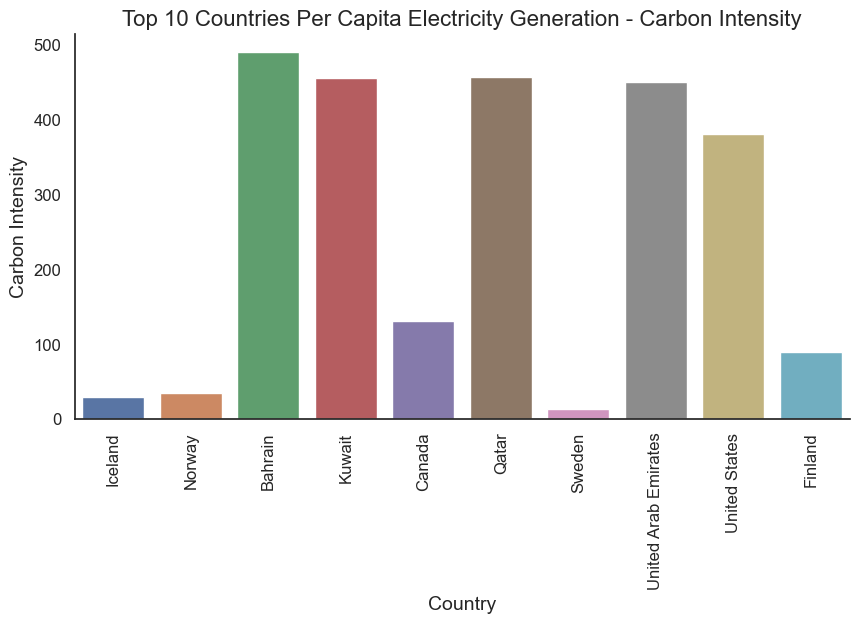

In [ ]:
# Plot the top 10 countries per capita electricity generation
plt.figure(figsize=(10,5))
sns.barplot(data=df_mean, x="Country", y="Carbon Intensity")
sns.despine()
plt.title("Top 10 Countries Per Capita Electricity Generation - Carbon Intensity")
plt.xticks(rotation=90)
plt.show()

#### Step 2.2 Takeaways
Iceland is by far the highest producer of per capita electricity generation! Looks like a mix between colder climate countries and countries rich in primary energy resources. The carbon intensity is measured in grams of carbon dioxide emitted per kilowatt-hour of electricity produced. It's pretty interesting to see major differences between these countries when, apart from Iceland, their per capita electricity generation is pretty similar. It would be interesting to explore the electricity mix for each of these countries.

#### Step 2.3
Let's explore the energy mix for the top 10 countries per capita electricity generation.

In [ ]:
# create dataframe with desired columns
df_1 = df_electricity[["year", "country"]]
# create another dataframe with columns that contain the string 'elec_per_capita'
df_2 = df_electricity.loc[:, df_electricity.columns.str.contains("elec_per_capita")]
# merge the two dataframe to create desired dataframe
df_elecmix = pd.concat([df_1, df_2], join='outer', axis=1)
# remove unwanted columns
df_elecmix = df_elecmix.drop(columns=["other_renewables_elec_per_capita", "renewables_elec_per_capita", "low_carbon_elec_per_capita", "fossil_elec_per_capita"])
# only keep the top 10 countries per capita electricity generation
df_elecmix = df_elecmix[df_elecmix["country"].str.contains("Iceland|Norway|Bahrain|Kuwait|Canada|Qatar|Sweden|United Arab Emirates|United States|Finland")==True]
# remove unwanted countries
df_elecmix = df_elecmix[df_elecmix["country"].str.contains("United States Virgin Islands")==False]
# remove common string as end of column names
df_elecmix.columns = df_elecmix.columns.str.replace('_elec_per_capita', '')
# converting columns to rows using pd.melt
df_elecmix = pd.melt(df_elecmix, id_vars=["year", "country"], value_vars=["biofuel", "coal", "gas", "hydro", "nuclear", "oil", "other_renewables_exc_biofuel", "solar", "wind"], var_name="Electricity Mix", value_name="Per Capita Electricity (KW-hrs)")
# rename columns
df_elecmix = df_elecmix.rename(columns={"year" : "Year", "country" : "Country"})
# Remove rows from prior to the year 2000
df_elecmix = df_elecmix[df_elecmix["Year"] >= 2000]
# drop all zero values
df_elecmix = df_elecmix[df_elecmix["Per Capita Electricity (KW-hrs)"] != 0]
# drop all NaN values
df_elecmix = df_elecmix.dropna(subset=["Per Capita Electricity (KW-hrs)"])
# reset index and drop the index column
df_elecmix = df_elecmix.reset_index(drop=True)
df_elecmix

,Year,Country,Electricity Mix,Per Capita Electricity (KW-hrs)
0,2000,Canada,biofuel,276.903
1,2001,Canada,biofuel,297.927
2,2002,Canada,biofuel,306.303
3,2003,Canada,biofuel,283.600
4,2004,Canada,biofuel,291.053
...,...,...,...,...
1146,2017,United States,wind,790.168
1147,2018,United States,wind,842.020
1148,2019,United States,wind,908.244
1149,2020,United States,wind,1031.265


Cool, we've got the dataset formatted. Let's try a plot using Seaborn to visualize the electricity mix for each country in 2020.

In [ ]:
# Isolate the year 2021
df_2021 = df_elecmix[df_elecmix["Year"]==2020]

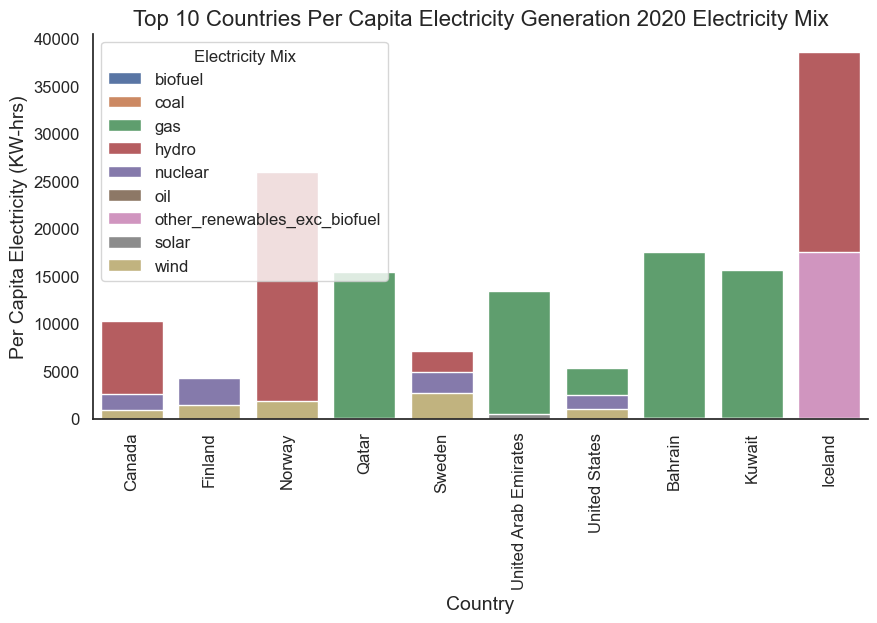

In [ ]:
# Plot each country's electricity mix
plt.figure(figsize=(10,5))
sns.barplot(data=df_2021, x="Country", y="Per Capita Electricity (KW-hrs)", hue="Electricity Mix", dodge=False, palette='deep')
sns.despine()
plt.title("Top 10 Countries Per Capita Electricity Generation 2020 Electricity Mix")
plt.xticks(rotation=90)
plt.show()

Let's see what Canada's electricity mix trends are over the last 20 years.

In [ ]:
# Create a dataframe for Canada
df_Canada = df_elecmix[df_elecmix["Country"].str.contains("Canada")==True]

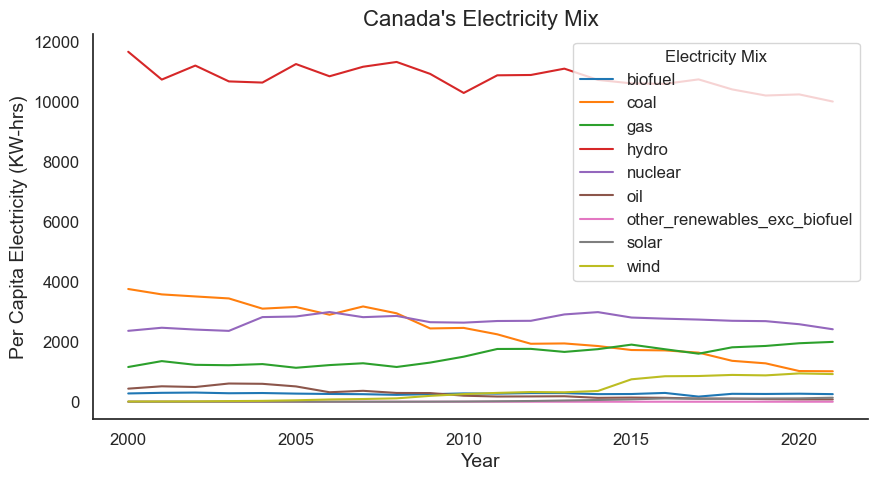

In [ ]:
# Plot Canada's electricity mix since 2000 using Seaborn
plt.figure(figsize=(10,5))
g = sns.lineplot(data=df_Canada, x="Year", y="Per Capita Electricity (KW-hrs)", hue="Electricity Mix", palette='tab10')
g.set(title="Canada's Electricity Mix")
sns.despine()
plt.show()

That's pretty interesting, we can visually see coal is trending down, while gas and wind are trending up. Hydro is by far Canada's dominant source of electricity generation. There's lots to explore in this dataset that will provide valuable insight for my research questions. We're ready to move forward with a more formal analysis.

## Data Analysis Pipeline
### Load Data

In [ ]:
df = pd.read_csv('../data/raw/owid-energy-data.csv')

### Clean, Process, and Wrangle Data
In my EDA, I manipulated the dataframe into multiple ways that will be useful for further analysis. Here, I will highlight the process for constructing each dataframe.

#### Master Electricity Dataframe
Contains all columns related to electricity. All null value rows removed. All non-countries impacting further analysis removed.

In [ ]:
### create dataframe to look at only electricity generation columns
# create dataframe with desired columns
df_1 = df[["year", "country", "population", "gdp"]]
# create another dataframe with columns that contain the string 'elec'
df_2 = df.loc[:, df.columns.str.contains("elec")]
# merge the two dataframe to create desired dataframe
df_electricity = pd.concat([df_1, df_2], join='outer', axis=1)
# remove all rows with NaN in column 'electricity_generation'
df_electricity = df_electricity.dropna(subset=["electricity_generation"])
# remove rows that don't reach the specified non-null value threshold
df_electricity = df_electricity.dropna(axis=0, thresh=5)
# remove all rows with Nan in column 'population'
df_electricity = df_electricity.dropna(subset=["population"])
# remove non-countries from dataset
df_electricity = df_electricity[df_electricity["country"].str.contains("World|Asia|income|America|Europe|Africa|Oceania")==False]
# reset index and drop the index column
df_electricity = df_electricity.reset_index(drop=True)

#### Electricity Comparison Dataframe
Contains all columns related to overall electricity metrics. Removed years prior to the year 2000. Created a new column for per capita electricity demand.

In [ ]:
# From df_electricity create dataframe to look compare electricity columns
df_comp = df_electricity[["year", "country", "population", "gdp", "carbon_intensity_elec", "low_carbon_electricity", "low_carbon_elec_per_capita", "low_carbon_share_elec", "electricity_generation", "per_capita_electricity", "electricity_demand"]]
# Change column names
df_comp = df_comp.rename(columns={"year" : "Year", "country" : "Country", "population" : "Population", "gdp" : "GDP", "carbon_intensity_elec" : "Carbon Intensity", "low_carbon_electricity" : "Low Carbon Electricity", "low_carbon_elec_per_capita" : "Per Capita Low Carbon", "low_carbon_share_elec" : "Share from Low Carbon Sources", "electricity_generation" : "Electricity Generation", "per_capita_electricity" : "Per Capita Generation", "electricity_demand" : "Electricity Demand"})
# Remove rows from prior to the year 2000
df_comp = df_comp[df_comp["Year"] >= 2000]
# Add a new column for per capita electricity demand converted from terawatt-hours to kilowatt-hours
df_comp["Per Capita Demand"] = (df_comp["Electricity Demand"] * 1e9) / df_comp["Population"]
# reset index and drop the index column
df_comp = df_comp.reset_index(drop=True)

#### Electricity Comparison Mean Values Dataframe
Contains the top 10 countries per capita electricity generation. The top 10 countries were identified using the mean values from 2016-2020 of the electricity comparison dataframe.

In [ ]:
# Further widdle down dataframe to look at the mean values from 2016-2020
df_mean = df_comp[df_comp["Year"] >= 2016]
df_mean = df_mean[df_mean["Year"] <= 2020]
# Find the mean values over the 5 year span for each country
df_mean = df_mean.groupby(["Country"], as_index=False).mean()
# drop year column
df_mean = df_mean.drop(columns=["Year"])
# sort by Per Capita Generation
df_mean = df_mean.sort_values(["Per Capita Generation"], ascending=False)
# reset index and keep only top 10 countries
df_mean = df_mean.reset_index(drop=True)
df_mean = df_mean.head(10)
df_mean = df_mean.round(decimals=2)

#### Electricity Mix Dataframe
Contains the electricity mix for the top 10 countries per capita electricity generation identified using the electricity comparison mean values dataframe. The dataframe was manipulated using pd.melt to convert all electricity mix columns to row, making it easier to plot using Seaborn.

In [ ]:
# create dataframe with desired columns
df_1 = df_electricity[["year", "country"]]
# create another dataframe with columns that contain the string 'elec_per_capita'
df_2 = df_electricity.loc[:, df_electricity.columns.str.contains("elec_per_capita")]
# merge the two dataframe to create desired dataframe
df_elecmix = pd.concat([df_1, df_2], join='outer', axis=1)
# remove unwanted columns
df_elecmix = df_elecmix.drop(columns=["other_renewables_elec_per_capita", "renewables_elec_per_capita", "low_carbon_elec_per_capita", "fossil_elec_per_capita"])
# only keep the top 10 countries per capita electricity generation
df_elecmix = df_elecmix[df_elecmix["country"].str.contains("Iceland|Norway|Bahrain|Kuwait|Canada|Qatar|Sweden|United Arab Emirates|United States|Finland")==True]
# remove unwanted countries
df_elecmix = df_elecmix[df_elecmix["country"].str.contains("United States Virgin Islands")==False]
# remove common string as end of column names
df_elecmix.columns = df_elecmix.columns.str.replace('_elec_per_capita', '')
# converting columns to rows using pd.melt
df_elecmix = pd.melt(df_elecmix, id_vars=["year", "country"], value_vars=["biofuel", "coal", "gas", "hydro", "nuclear", "oil", "other_renewables_exc_biofuel", "solar", "wind"], var_name="Electricity Mix", value_name="Per Capita Electricity (KW-hrs)")
# rename columns
df_elecmix = df_elecmix.rename(columns={"year" : "Year", "country" : "Country"})
# Remove rows from prior to the year 2000
df_elecmix = df_elecmix[df_elecmix["Year"] >= 2000]
# drop all zero values
df_elecmix = df_elecmix[df_elecmix["Per Capita Electricity (KW-hrs)"] != 0]
# drop all NaN values
df_elecmix = df_elecmix.dropna(subset=["Per Capita Electricity (KW-hrs)"])
# reset index and drop the index column
df_elecmix = df_elecmix.reset_index(drop=True)

## Method Chaining and Writing Python Programs
Functions were created to easily reproduce each dataframe. These programs were moved to project_functions1.py for use in this repository.

In [ ]:
# def reset_index(dataframe):
#     """Function to reset index and drop the index column"""
#     dataframe = dataframe.reset_index(drop=True)
#     return dataframe

In [ ]:
# def electricitymaster(path):
#     """Function to produce master electricity dataframe.\n Contains all columns related to electricity.\n All null value rows removed. All non-countries impacting further analysis removed.  """
    
#     # Load data
#     df = pd.read_csv(path)
#     # Create dataframe with desired columns
#     df_1 = df[["year", "country", "population", "gdp"]]
#     # Create another dataframe with columns that contain the string 'elec'
#     df_2 = df.loc[:, df.columns.str.contains("elec")]
    
#     # Method Chain 1 (create master electricity dataframe)
#     df_electricity = (
#         pd.concat([df_1, df_2], join='outer', axis=1)
#         .dropna(subset=["electricity_generation"])
#         .dropna(axis=0, thresh=5)
#         .dropna(subset=["population"])
#     )
    
#     # Remove unwanted data entries and reset index)
#     df_electricity = df_electricity[df_electricity["country"].str.contains("World|Asia|income|America|Europe|Africa|Oceania")==False]
#     df_electricity = reset_index(df_electricity)
    
#     return df_electricity

In [ ]:
# def electricitycomp(path):
#     """Function to produce the electricity comparison dataframe.\n This dataframe contains all columns related to overall electricity metrics.\n Removed years prior to the year 2000.\n Created a new column for per capita electricity demand."""
    
#     # Call the electricity master function
#     df_electricity = electricitymaster(path)

#     # Method Chain 2 (create electricity comparison dataframe)
#     df_comp = (
#         df_electricity[["year", "country", "population", "gdp", "carbon_intensity_elec", "low_carbon_electricity", "low_carbon_elec_per_capita", "low_carbon_share_elec", "electricity_generation", "per_capita_electricity", "electricity_demand"]]
#         .rename(columns={"year" : "Year"})
#         .rename(columns={"country" : "Country"})
#         .rename(columns={"population" : "Population"})
#         .rename(columns={"gdp" : "GDP"})
#         .rename(columns={"carbon_intensity_elec" : "Carbon Intensity"})
#         .rename(columns={"low_carbon_electricity" : "Low Carbon Electricity"})
#         .rename(columns={"low_carbon_elec_per_capita" : "Per Capita Low Carbon"})
#         .rename(columns={"low_carbon_share_elec" : "Share from Low Carbon Sources"})
#         .rename(columns={"electricity_generation" : "Electricity Generation"})
#         .rename(columns={"per_capita_electricity" : "Per Capita Generation"})
#         .rename(columns={"electricity_demand" : "Electricity Demand"})
#     )
        
#     # Remove rows from prior to the year 2000
#     df_comp = df_comp[df_comp["Year"] >= 2000]
#     # Add a new column for per capita electricity demand converted from terawatt-hours to kilowatt-hours
#     df_comp["Per Capita Demand"] = (df_comp["Electricity Demand"] * 1e9) / df_comp["Population"]
#     # Call reset index function
#     df_comp = reset_index(df_comp)
    
#     return df_comp

In [ ]:
# def electricitymean(path):
#     """Function to produce the electricity comparison mean values dataframe.\n This dataframe contains the top 10 countries based on electricity generation per capita.\n All values are mean values from the years 2016-2020."""
    
#     # Call the electricity mean function
#     df_comp = electricitycomp(path)
    
#     # Further widdle down dataframe to look at the mean values from 2016-2020
#     df_5 = df_comp[df_comp["Year"] >= 2016]
#     df_5 = df_5[df_5["Year"] <= 2020]
    
#     # Method Chain 3 (Find the mean values over the 5 year span for each country and sort according to per capita electricity generation)
#     df_mean = (
#         df_5.groupby(["Country"], as_index=False).mean()
#         .sort_values(["Per Capita Generation"], ascending=False)
#         .reset_index(drop=True)
#         .drop(columns=["Year"])
#         .head(10)
#         .round(decimals=2)
#     )
    
#     return df_mean

In [ ]:
# def electricitymix(path):
#     """Function to produce the electricity mix dataframe.\n Contains the energy mix for the top 10 countries per capita electricity generation identified using the electricity comparison mean values dataframe.\n The dataframe was manipulated using pd.melt to convert all electricity mix columns to row, making it easier to plot using Seaborn."""
    
#     # Call the electricity master function
#     df_electricity = electricitymaster(path)

#     # Create dataframe with desired columns
#     df_3 = df_electricity[["year", "country"]]
#     # Create another dataframe with columns that contain the string 'elec_per_capita'
#     df_4 = df_electricity.loc[:, df_electricity.columns.str.contains("elec_per_capita")]
    
#     # Method Chain 4 (create energy mix dataframe)
#     df_elecmix = (
#         pd.concat([df_3, df_4], join='outer', axis=1)
#         .drop(columns=["other_renewables_elec_per_capita", "renewables_elec_per_capita", "low_carbon_elec_per_capita", "fossil_elec_per_capita"])
#         .rename(columns={'year' : 'Year'})
#         .rename(columns={'country' : 'Country'})
#     )
    
#     # Simplify column labels
#     df_elecmix.columns = df_elecmix.columns.str.replace('_elec_per_capita', '')
    
#     # Keep only the top 10 countries and remove all other data entries
#     df_elecmix = df_elecmix[df_elecmix["Country"].str.contains("Iceland|Norway|Bahrain|Kuwait|Canada|Qatar|Sweden|United Arab Emirates|United States|Finland")==True]
#     df_elecmix = df_elecmix[df_elecmix["Country"].str.contains("United States Virgin Islands")==False]
    
#     # Convert columns to rows using pd.melt
#     df_elecmix = pd.melt(df_elecmix, id_vars=["Year", "Country"], value_vars=["biofuel", "coal", "gas", "hydro", "nuclear", "oil", "other_renewables_exc_biofuel", "solar", "wind"], var_name="Electricity Mix", value_name="Per Capita Electricity (KW-hrs)")
    
#     # Filter dataset and reset index
#     df_elecmix = df_elecmix[df_elecmix["Year"] >= 2000]
#     df_elecmix = df_elecmix[df_elecmix["Per Capita Electricity (KW-hrs)"] != 0]
#     df_elecmix = df_elecmix.dropna(subset=["Per Capita Electricity (KW-hrs)"])
#     df_elecmix = reset_index(df_elecmix)
    
#     return df_elecmix

# Data Analysis
Using the findings from the exploratory data analysis and the work that went into creating python programs to manipulate the raw data, we are ready to conduct a more formal data analysis.

### Plot Settings

In [ ]:
sns.set_theme(style='white')
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('legend', fontsize=10)

### Refined Research Questions
1) What are the top 10 countries based on electricity generation per capita and what is their electricity mix?
2) How much of their electricity is generated from low carbon sources (renewables and nuclear)?
3) Is there a correlation between more electricity generated from low carbon sources and decreased carbon dioxide emissions?
4) Is there a trend in these countries to generate more electricity from low carbon sources and phase out non-renewable sources?

#### Top 10 Countries based on Electricity Generation Per Capita
This dataframe was generated from raw data provided by [Our World in Data](https://ourworldindata.org/energy). The **mean values** for each column over a **5 year period (2016-2020)** were found and sorted to identify the top 10 countries.

In [ ]:
import project_functions1

In [ ]:
dfmean = project_functions1.electricitymean("../data/raw/owid-energy-data.csv")
dfmean

,Country,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
0,Iceland,336720.6,1.472628e+10,28.16,19.24,57150.72,99.99,19.25,57158.06,19.25,57156.68
1,Norway,5337067.0,4.421678e+11,33.61,143.00,26798.50,97.34,146.91,27530.21,133.00,24924.12
2,Bahrain,1566411.4,6.100816e+10,490.13,0.01,6.41,0.03,28.67,18320.46,28.80,18396.37
3,Kuwait,4125583.6,2.793532e+11,455.41,0.06,14.40,0.08,73.42,17797.93,68.27,16554.92
4,Canada,37068556.8,1.630664e+12,130.76,533.98,14408.11,81.30,656.81,17723.78,582.69,15722.74
5,Qatar,2774783.8,3.946736e+11,456.95,0.12,44.46,0.26,46.98,16917.95,43.81,15782.05
6,Sweden,9969637.8,4.537049e+11,12.26,159.66,16012.86,97.83,163.20,16368.58,143.40,14386.60
7,United Arab Emirates,9628014.6,7.235323e+11,449.79,2.47,252.79,1.80,135.19,14041.34,126.21,13110.95
8,United States,327052908.8,1.763316e+13,380.60,1582.98,4838.92,36.30,4361.60,13337.09,4156.57,12710.22
9,Finland,5520909.6,2.101688e+11,88.80,55.62,10074.44,79.72,69.77,12638.04,87.25,15803.81


In [ ]:
# isolate and combine per capita low carbon and per capita generation for plotting purposes
dfmean1 = dfmean[["Country", "Per Capita Generation", "Per Capita Low Carbon"]]
dfmean1 = dfmean1.rename(columns={"Per Capita Low Carbon" : "Low Carbon Sources", "Per Capita Generation" : "All Sources"})
dfmean1 = pd.melt(dfmean1, id_vars=["Country"], value_vars=["Low Carbon Sources", "All Sources"], var_name="Per Capita Electricity Generation", value_name="Kilowatt-hours")

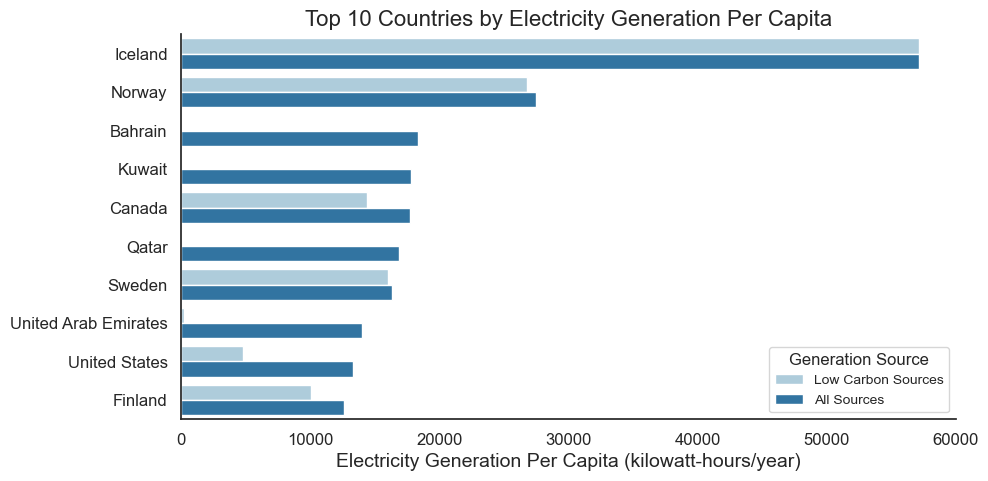

In [ ]:
# Plot the top 10 countries per capita electricity generation
plt.figure(figsize=(10,5))
sns.barplot(data=dfmean1, y="Country", x="Kilowatt-hours", hue="Per Capita Electricity Generation", palette="Paired")
sns.despine()
plt.title("Top 10 Countries by Electricity Generation Per Capita")
plt.xlabel("Electricity Generation Per Capita (kilowatt-hours/year)")
plt.ylabel("")
plt.legend(title="Generation Source")
plt.show()

This figure shows the top 10 countries based on electricity generation per captia, measured in kilowatt hours. The dark blue colour indicates electricity generation for all sources, while the light blue colour indicates electricity generation from low carbon sources (renewables and nuclear power). Iceland is by far the leader in electricity generation per capita. Notably, nearly 100% of it's electricity comes from low carbon sources! Interestingly, all three major Scandinavian countries made the top 10 list: Norway, Sweden, and Finland. Canada lands at 5 on the list. There are four countries with next to zero low carbon sources for electricity generation: Bahrain, Kuwait, Qatar, and United Arab Emirates.

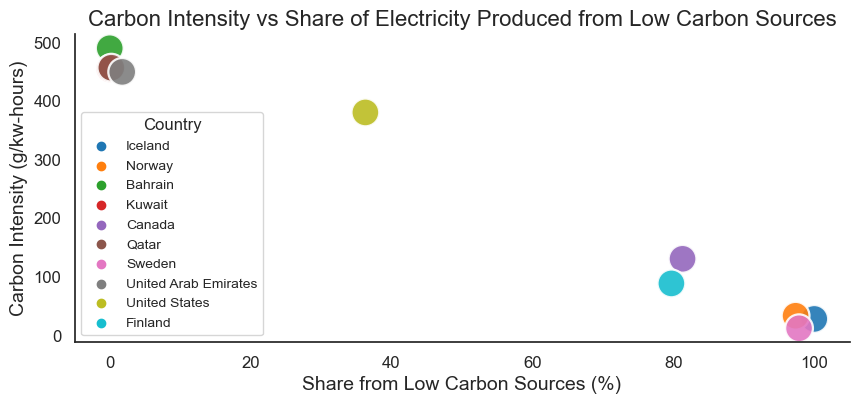

In [ ]:
# Plot the carbon intensity vs the share from low carbon sources
plt.figure(figsize=(10,4))
ax = sns.scatterplot(data=dfmean, x="Share from Low Carbon Sources", y="Carbon Intensity", hue="Country", palette="tab10", s=400, alpha=0.9)
sns.despine()
plt.xlabel("Share from Low Carbon Sources (%)")
plt.ylabel("Carbon Intensity (g/kw-hours)")
plt.title("Carbon Intensity vs Share of Electricity Produced from Low Carbon Sources")
    
# label data points
#for i, txt in enumerate(dfmean["Country"]):
    #ax.annotate(txt, (dfmean["Share from Low Carbon Sources"][i]+2, dfmean["Carbon Intensity"][i]+1), size=8)

plt.show()

This figure compares the share from low carbon sources against the carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour. Iceland, Norway, and Sweden all have near 100% of their electricity production from low carbon sources, and consequently we see their carbon intensity is low. Canada and Finland both have roughly 80% share of electricity production from low carbon sources and their carbon intensity is a little higher. United States has a 36% share of electricity produced from low carbon sources. It's carbon intensity is significantly higher. United Arab Emirates, Qatar, Kuwait, and Bahrain all have next to zero electricity production from low carbon sources. Consequently, their carbon intensity is very high. Based on this figure, it is evident there is a positive correlation between more electricity generated from low carbon sources and decreased carbon dioxide emissions.

In [ ]:
dfmix = project_functions1.electricitymix("../data/raw/owid-energy-data.csv")

In [ ]:
# Find the mean values from year 2015 to 2020
dfmix1 = dfmix.loc[(dfmix["Year"] >= 2015) & (dfmix["Year"] <= 2020)]
dfmix1 = dfmix1.groupby(["Country", "Electricity Mix"], as_index=False).mean()

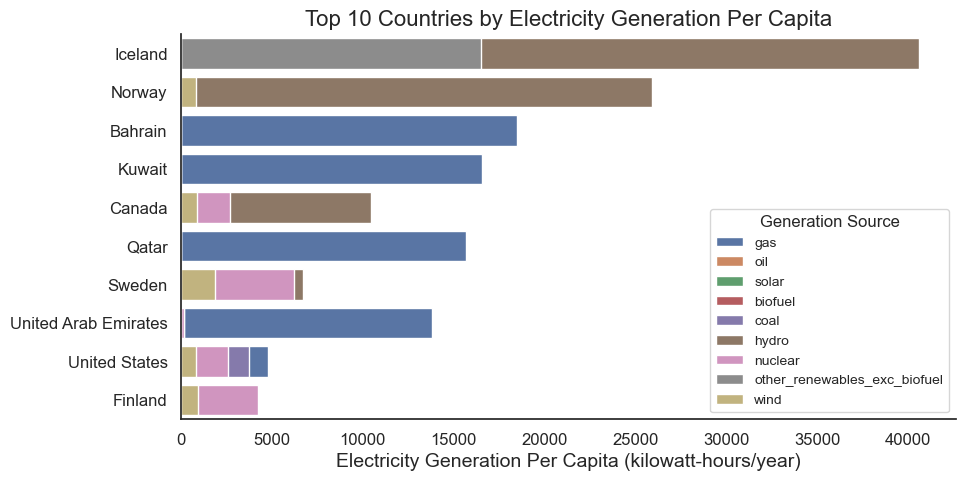

In [ ]:
# Plot each country's electricity mix
plt.figure(figsize=(10,5))
sns.barplot(data=dfmix1, y="Country", x="Per Capita Electricity (KW-hrs)", hue="Electricity Mix", dodge=False, palette='deep', errorbar=None, order=("Iceland", "Norway", "Bahrain", "Kuwait", "Canada", "Qatar", "Sweden", "United Arab Emirates", "United States", "Finland"))
sns.despine()
plt.title("Top 10 Countries by Electricity Generation Per Capita")
plt.xlabel("Electricity Generation Per Capita (kilowatt-hours/year)")
plt.ylabel("")
plt.legend(title="Generation Source")
plt.show()

This figure shows the breakdown of each country's electricity mix taken as the average from year 2015 to 2020. The category "other renewables excluding biofuel" includes biomass and waste, geothermal, wave and tidal. We can see Bahrain, Kuwait, Qatar, and the United Arab Emirates are all rich in gas resources, explaining their lack of low carbon sources for electricity production. Iceland, Norway, and Canada all have a large supply of electricity generation from hydropower. Norway, Canada, Sweden, United States, and Finland all have a considerable amount of electricity generation from wind.

In [ ]:
# Sum all countries by year and electricity mix categories
dfmix2 = dfmix.groupby(["Electricity Mix", "Year"], as_index=False).sum()
dfmix2 = dfmix2[dfmix2["Year"] != 2021]

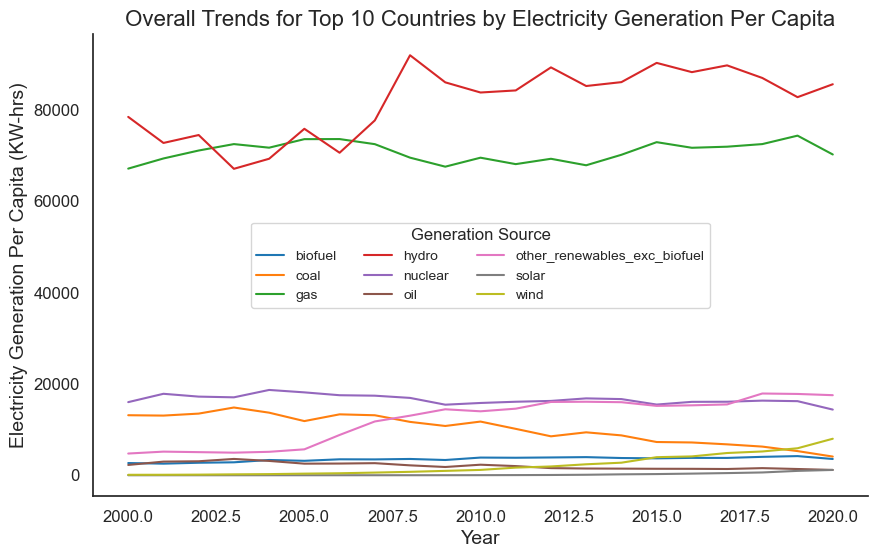

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dfmix2, x="Year", y="Per Capita Electricity (KW-hrs)", hue="Electricity Mix", palette='tab10')
sns.despine()
plt.title("Overall Trends for Top 10 Countries by Electricity Generation Per Capita")
plt.xlabel("Year")
plt.ylabel("Electricity Generation Per Capita (KW-hrs)")
plt.legend(title="Generation Source", loc='center', bbox_to_anchor=(0.5,0.5), ncol=3)
plt.show()

The figure above shows the combined trends for each electricity generation source from 2000 to 2020 for the top 10 countries by electricity generation per capita. The following can be gleaned from the figure:

| Electricity Source | Trend |
| :-- | :-- |
| Hydropower | Increase |
| Gas | Stable |
| Nuclear | Stable |
| Coal | Decrease |
| Other Renewables | Increase |
| Biofuel | Stable |
| Oil | Small Decrease |
| Wind | Increase |
| Solar | Small Increase |

In general terms, it can stated that renewables show stable or increasing trends in electricity generation, while non-renewables show stable or decreasing trends in electricity generation.


# Conclusion
The top 10 countries based on electricity generation per capita are:
1) Iceland
2) Norway
3) Bahrain
4) Kuwait
5) Canada
6) Qatar
7) Sweden
8) United Arab Emirates
9) United States
10) Finland

Iceland, Norway and Sweden all generate almost all of their electricity from low carbon sources, and as such, their carbon dioxide emissions from electricity production are minimal.

Bahrain, Kuwait, Qatar, and the United Arab Emirates are all rich in gas as a natural resource. Consequently, the vast majority of their electricity generation is from gas. They have almost no electricity generation from low carbon sources, and as such, their carbon dioxide emissions from electricity production are high.

The United States has 36% share of electricity produced from low carbon sources and relies heavily on gas (fossil fuels) for electricity generation. The country's carbon dioxide emissions from electricity production are relatively high.

Canada and Finland have approximately 80% share of electricity produced from low carbon sources. Finland relies mostly on nuclear power, while Canada generates the majority of its electricity from nuclear and hydropower. Their carbon dioxide emissions from electricity production are relatively low.

The combined trend for the top 10 countries is stable or increasing electricity generation from renewables and stable or decreasing electricity generation from non-renewables.

### Tableau Dashboard Data
The following dataframes were saved to the processed folder for use in the corresponding Tableau dashboard.

In [ ]:
# Read in electricity comparison dataframe from python function 1
dfcomp = project_functions1.electricitycomp("../data/raw/owid-energy-data.csv")

# Save the dataframe to csv in the project repository data/processed folder
dfcomp.to_csv("../data/processed/electricitycomparison.csv", index=None)

In [ ]:
dfcomp

,Year,Country,Population,GDP,Carbon Intensity,Low Carbon Electricity,Per Capita Low Carbon,Share from Low Carbon Sources,Electricity Generation,Per Capita Generation,Electricity Demand,Per Capita Demand
0,2000,Afghanistan,20779958.0,1.128379e+10,255.319,0.31,14.918,65.957,0.47,22.618,0.57,27.430277
1,2001,Afghanistan,21606992.0,1.102127e+10,118.644,0.50,23.141,84.746,0.59,27.306,0.69,31.934107
2,2002,Afghanistan,22600774.0,1.880487e+10,144.928,0.56,24.778,81.159,0.69,30.530,0.79,34.954555
3,2003,Afghanistan,23680872.0,2.107434e+10,255.319,0.63,26.604,67.021,0.94,39.694,1.04,43.917302
4,2004,Afghanistan,24726690.0,2.233257e+10,269.663,0.56,22.648,62.921,0.89,35.993,0.99,40.037708
...,...,...,...,...,...,...,...,...,...,...,...,...
4501,2016,Zimbabwe,14030338.0,2.096179e+10,442.815,3.32,236.630,48.680,6.82,486.090,8.67,617.946624
4502,2017,Zimbabwe,14236599.0,2.194784e+10,363.885,4.26,299.229,58.276,7.31,513.465,9.53,669.401449
4503,2018,Zimbabwe,14438812.0,2.271535e+10,358.160,5.40,373.992,59.146,9.13,632.324,10.15,702.966421
4504,2019,Zimbabwe,14645473.0,NaN,288.240,7.65,522.346,67.639,11.31,772.252,12.42,848.043624


In [ ]:
# Read in electricity master dataframe from python function 1
df_elecmix = project_functions1.elecmix("../data/raw/owid-energy-data.csv")

# Save the dataframe to csv in the project repository data/processed folder
df_elecmix.to_csv("../data/processed/electricitymix.csv", index=None)

In [ ]:
df_elecmix

,Year,Country,Electricity Mix,Per Capita Electricity (KW-hrs)
0,2014,Angola,biofuel,42.313
1,2015,Angola,biofuel,41.242
2,2016,Angola,biofuel,41.605
3,2017,Angola,biofuel,5.701
4,2018,Angola,biofuel,5.518
...,...,...,...,...
17481,2017,Vietnam,wind,3.700
17482,2018,Vietnam,wind,5.097
17483,2019,Vietnam,wind,7.485
17484,2020,Vietnam,wind,11.031
